In [1]:
%matplotlib notebook
%pylab
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
#
# Units conversion functions.
#
w2db = lambda w: 10.0 * log10(w)
w2dbm = lambda w: 30.0 + w2db(w)
dbm2w = lambda dbm: 10 ** ((dbm - 30.0) / 10.0)
db2w = lambda db: 10 ** (db / 10)

speed_of_light = 2.99792458 * 10e8
frequency = 860*10e6
wave_length = speed_of_light / frequency

In [3]:
#
# Different radiation antenna patterns. We consider only symmetric antenna 
# radiation patterns so each pattern is a function of a single angle between
# antenna normal and direction.
#
isotropic_rp    = lambda theta: 1.0
dipole_rp       = lambda theta: np.abs(cos(pi/2 * sin(theta)) / cos(theta))
array_dipole_rp = lambda theta, n: np.abs(sin(n * pi/2 *sin(theta)) / sin(pi/2 *sin(theta))) / n
helix_rp        = lambda theta, n: np.abs(cos(theta) * sin(n * pi/2 *cos(theta)) / sin(pi/2 *cos(theta)))

<IPython.core.display.Javascript object>


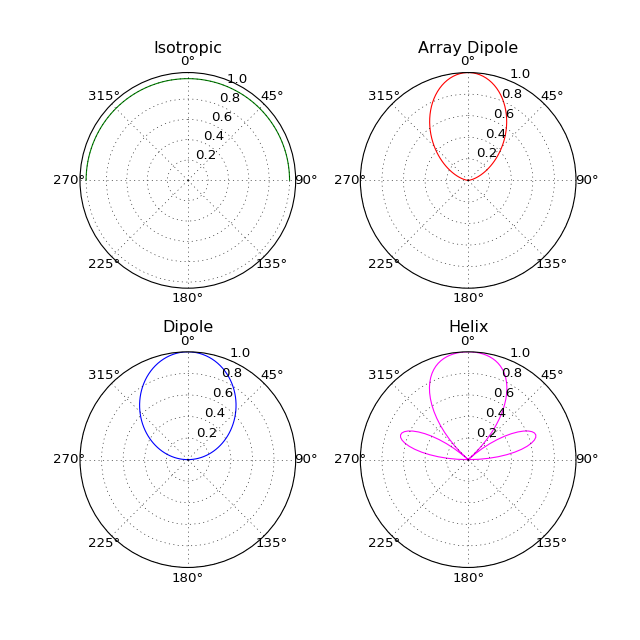

In [4]:
#
# Plotting radiation pattern of different antennas
#
theta = np.linspace(-pi/2 + 0.001, pi/2 - 0.001, num=100)
r1 = [isotropic_rp(t) for t in theta]
r2 = [dipole_rp(t) for t in theta]
r3 = [array_dipole_rp(t, 2) for t in theta]
r4 = [helix_rp(t, 3) for t in theta]

figure(1, figsize=(8,8))
ax1 = subplot2grid((2,2), (0,0), projection='polar')
ax2 = subplot2grid((2,2), (1,0), projection='polar')
ax3 = subplot2grid((2,2), (0,1), projection='polar')
ax4 = subplot2grid((2,2), (1,1), projection='polar')

ax1.plot(theta, r1, color='green', linewidth=1)
ax2.plot(theta, r2, color='blue', linewidth=1)
ax3.plot(theta, r3, color='red', linewidth=1)
ax4.plot(theta, r4, color='magenta', linewidth=1)

ax1.set_theta_zero_location('N')
ax2.set_theta_zero_location('N')
ax3.set_theta_zero_location('N')
ax4.set_theta_zero_location('N')

ax1.set_title("Isotropic", va='bottom')
ax2.set_title("Dipole", va='bottom')
ax3.set_title("Array Dipole", va='bottom')
ax4.set_title("Helix", va='bottom')

ax1.set_theta_direction(-1)
ax2.set_theta_direction(-1)
ax3.set_theta_direction(-1)
ax4.set_theta_direction(-1)

plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

# ax.set_rscale('log')
# ax.set_rmax(0.008)
# ax.grid(True)

In [5]:
patch_k = 2*pi / wave_length
patch_W = wave_length * 2/5
patch_L = wave_length * 2/5

patch_kW = patch_k * patch_W / 2
patch_kL = patch_k * patch_L / 2

# common member
def patch_cm_rp(theta, phi):
    return sin(patch_kW*sin(theta)*sin(phi)) / (patch_kW*sin(theta)*sin(phi)) * cos(patch_kL*sin(theta)*cos(phi)) 

patch_theta_rp = lambda theta, phi: patch_cm_rp(theta, phi) * cos(phi)
patch_phi_rp   = lambda theta, phi: -1*patch_cm_rp(theta, phi) * sin(phi) * cos(theta)

patch_rp = lambda theta, phi: absolute(patch_cm_rp(theta, phi)) * sqrt(cos(phi)**2 + cos(theta)**2 * sin(phi)**2)
# patch_rp = lambda theta, phi: sqrt(patch_theta_rp(theta, phi)**2+patch_phi_rp(theta, phi)**2)

<IPython.core.display.Javascript object>


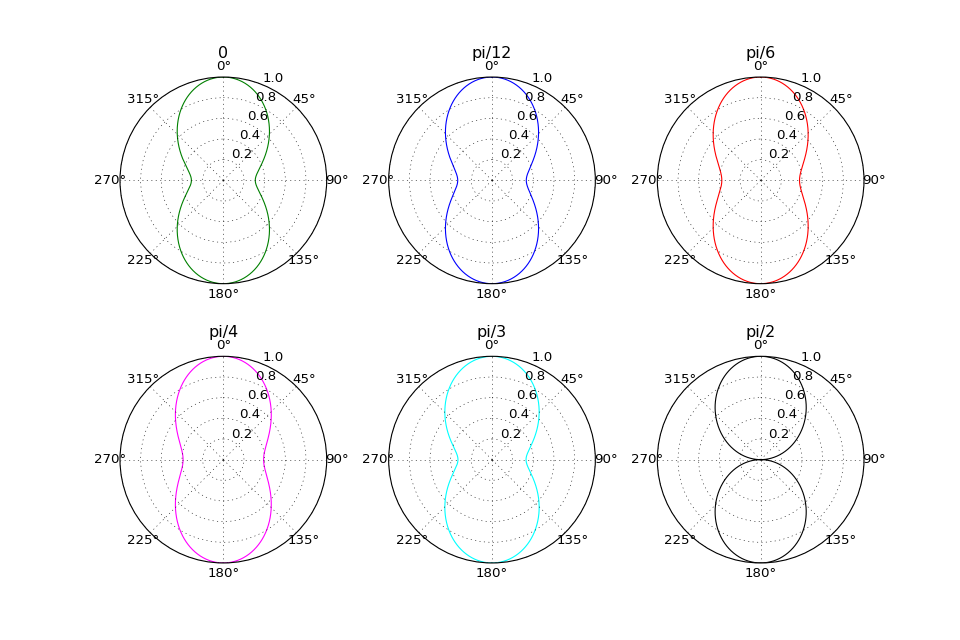

In [6]:
theta = np.linspace(0.0001, 2*pi-0.00001, num=1000)

def log_rp(theta, phi, rp): 
    value = w2db(rp(theta, phi)) + 40
    if (value < 0):
        return 0
    else:
        return value

r1 = [patch_rp(t, 0.0001) for t in theta]
r2 = [patch_rp(t, pi/12) for t in theta]
r3 = [patch_rp(t, pi/6) for t in theta]
r4 = [patch_rp(t, pi/4) for t in theta]
r5 = [patch_rp(t, pi/3) for t in theta]
r6 = [patch_rp(t, pi/2) for t in theta]

figure(2, figsize=(12,8))
ax1 = subplot2grid((2,3), (0,0), projection='polar')
ax2 = subplot2grid((2,3), (0,1), projection='polar')
ax3 = subplot2grid((2,3), (0,2), projection='polar')
ax4 = subplot2grid((2,3), (1,0), projection='polar')
ax5 = subplot2grid((2,3), (1,1), projection='polar')
ax6 = subplot2grid((2,3), (1,2), projection='polar')

ax1.plot(theta, r1, color='green',   linewidth=1)
ax2.plot(theta, r2, color='blue',    linewidth=1)
ax3.plot(theta, r3, color='red',     linewidth=1)
ax4.plot(theta, r4, color='magenta', linewidth=1)
ax5.plot(theta, r5, color='cyan',    linewidth=1)
ax6.plot(theta, r6, color='black',   linewidth=1)

ax1.set_theta_zero_location('N')
ax2.set_theta_zero_location('N')
ax3.set_theta_zero_location('N')
ax4.set_theta_zero_location('N')
ax5.set_theta_zero_location('N')
ax6.set_theta_zero_location('N')

ax1.set_title("0", va='bottom')
ax2.set_title("pi/12", va='bottom')
ax3.set_title("pi/6", va='bottom')
ax4.set_title("pi/4", va='bottom')
ax5.set_title("pi/3", va='bottom')
ax6.set_title("pi/2", va='bottom')

ax1.set_theta_direction(-1)
ax2.set_theta_direction(-1)
ax3.set_theta_direction(-1)
ax4.set_theta_direction(-1)
ax5.set_theta_direction(-1)
ax6.set_theta_direction(-1)

plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

In [7]:
#
# Reflection koefficients. Each reflection koefficient depends on the material
# the reflecting ray meets. In basic case, reflection is constant, so all the
# energy fell is reflected.
#
constant_reflection = lambda phi: -1.0

# conductivity at 860-920 MHz (sigma):
#   very dry ground   | 0.00014 S/m
#   medium dry ground | 0.03 S/m
#   wet ground        | 0.15 S/m
#   sea water         | 5 S/m
conductivity = 0.03

# relative permittivity at 860-920 MHz
#   very dry ground   | 3
#   medium dry ground | 15
#   wet ground        | 30
#   sea water         | 70
relative_permittivity = 15

eta = relative_permittivity - 60j * wave_length * conductivity

c_paral = lambda phi: sqrt(eta - cos(phi)**2)
c_perp  = lambda phi: sqrt(eta - cos(phi)**2) / eta

# Reflection coefficients for parallel and perpendicular to reflector polarized wave.
reflection_paral = lambda phi: (sin(phi) - c_paral(phi)) / (sin(phi) + c_paral(phi))
reflection_perp  = lambda phi: (sin(phi) - c_perp(phi)) / (sin(phi) + c_perp(phi))

# Reflection coefficients for circular polarized wave 
reflection_circular = lambda phi: (reflection_paral(phi) + reflection_perp(phi))/2

<IPython.core.display.Javascript object>


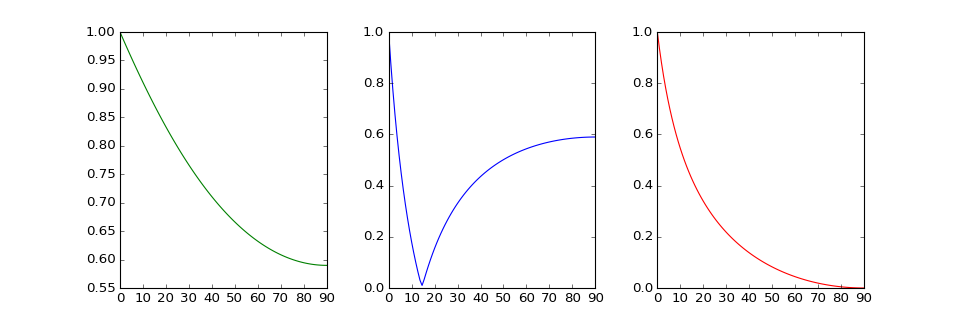

In [8]:
phi = np.linspace(0.0, pi/2, num=100)

r_pl = [np.absolute(reflection_paral(t)) for t in phi]
r_pp = [np.absolute(reflection_perp(t)) for t in phi]
r_c  = [np.absolute(reflection_circular(t)) for t in phi]

figure(3, figsize=(12,4))
ax1 = subplot2grid((1,3), (0,0))
ax2 = subplot2grid((1,3), (0,1))
ax3 = subplot2grid((1,3), (0,2))

ax1.plot(phi*180/pi, r_pl, color='green', linewidth=1)
ax2.plot(phi*180/pi, r_pp, color='blue', linewidth=1)
ax3.plot(phi*180/pi, r_c, color='red', linewidth=1)

plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

In [9]:
#
# Definining reader, tag and wireless transmission, or environment, parameters.
#

# environment parameters
ground_reflection_r2t = reflection_circular
ground_reflection_t2r = reflection_paral
thermal_noise = -116 #dBm

# reader paramters
reader_height = 5.0 #m
reader_angle  = pi/4
reader_tx_power = 31.5 #dBm
reader_antenna_gain = 8 #dBi
reader_noise  = -80 #dBm
reader_cabel_loss = -2 
reader_rp = lambda alpha: patch_rp(alpha - reader_angle, 0.00001)

# tag parameters 
tag_speed = 20 #mps
tag_height = 0.5 #m
tag_angle  = pi/2
tag_antenna_gain = 2 #dBi 
tag_modulation_loss = -12.0 #dB
tag_sensitivity=-18.5 #dBm
tag_rp = lambda alpha: dipole_rp(alpha - tag_angle)

# mutual parameters
polarization_loss = -6.0 #dB
ceil_height = 6

In [10]:
#
# Path loss computing. First function performs free-space path loss computation and
# the second one performs two-ray path loss considering ground reflection
#
def FSPL(distance, time, ground_reflection, speed):
    d0 = sqrt((reader_height - tag_height)**2 + distance**2)
    alpha0 = arctan(distance / (reader_height - tag_height))
    g0 = reader_rp(alpha0) * tag_rp(alpha0)
    K = wave_length / (4*pi)
    return (K*g0/d0)**2

def R2PL(distance, time, ground_reflection, speed):
    d0 = sqrt((reader_height - tag_height)**2 + distance**2)
    d1 = sqrt((reader_height + tag_height)**2 + distance**2)
    alpha0 = arctan(distance / (reader_height - tag_height))
    alpha1 = arctan(distance / (reader_height + tag_height))
    g0 = reader_rp(alpha0) * tag_rp(alpha0)
    g1 = reader_rp(alpha1) * tag_rp(alpha1)
    r1 = ground_reflection(alpha1)
    k = 2*pi / wave_length
    return (0.5/k)**2 * np.absolute( g0/d0*np.exp(-1j*k*d0) + 
                                    g1*r1/d1*np.exp(-1j*k*d1) )**2

def R2PL_Doppler(distance, time, ground_reflection, speed):
    d0 = sqrt((reader_height - tag_height)**2 + distance**2)
    d1 = sqrt((reader_height + tag_height)**2 + distance**2)
    alpha0 = arctan(distance / (reader_height - tag_height))
    alpha1 = arctan(distance / (reader_height + tag_height))
    g0 = reader_rp(alpha0) * tag_rp(alpha0)
    g1 = reader_rp(alpha1) * tag_rp(alpha1)
    r1 = ground_reflection(alpha1)
    k = 2*pi / wave_length
    return (0.5/k)**2 * np.absolute( g0/d0*np.exp(-1j*k*(d0 - speed*time*cos(pi/2 + alpha0))) + 
                                  g1*r1/d1*np.exp(-1j*k*(d1 - speed*time*cos(pi/2 + alpha1))) )**2

# with ceiling reflection
def R3PL_Doppler(distance, time, ground_reflection, speed):
    d0 = sqrt((reader_height - tag_height)**2 + distance**2)
    d1 = sqrt((reader_height + tag_height)**2 + distance**2)
    d2 = sqrt((2*ceil_height - reader_height - tag_height)**2 + distance**2)
    alpha0 = arctan(distance / (reader_height - tag_height))
    alpha1 = arctan(distance / (reader_height + tag_height))
    alpha2 = arctan(distance / (2*ceil_height - reader_height - tag_height))
    g0 = reader_rp(alpha0) * tag_rp(alpha0)
    g1 = reader_rp(alpha1) * tag_rp(alpha1)
    g2 = reader_rp(alpha2) * tag_rp(pi - alpha2)
    r1 = ground_reflection(alpha1)
    r2 = ground_reflection(alpha2)
    k = 2*pi / wave_length
    return (0.5/k)**2 * np.absolute( g0/d0*np.exp(-1j*k*(d0 - speed*time*cos(pi/2 + alpha0))) + 
                                  g1*r1/d1*np.exp(-1j*k*(d1 - speed*time*cos(pi/2 + alpha1))) +
                                  g2*r2/d2*np.exp(-1j*k*(d1 - speed*time*cos(pi/2 + alpha2))))**2


<IPython.core.display.Javascript object>


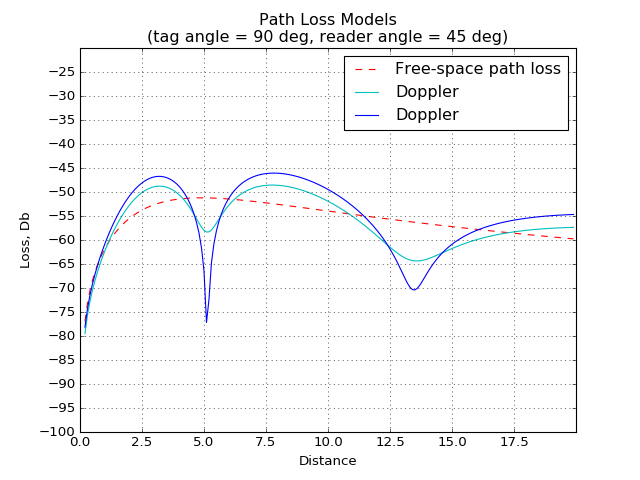

In [11]:
d = arange(0.2, 20, 0.1)

fig = figure(4)
ax = subplot(111)
plot(d, w2db(FSPL(d, 0, constant_reflection, 0)), 'r--', label='Free-space path loss')
# plot(d, w2db(R2PL(d, ground_reflection_r2t)), 'b',   label='r2t')
# plot(d, w2db(R2PL(d, ground_reflection_t2r)), 'g',   label='t2r')

plot(d, w2db(R2PL_Doppler(d, 0.0, ground_reflection_t2r, 20)) , 'c',   label='Doppler')
# plot(d, w2db(R2PL_Doppler(d, ground_reflection_r2t, 0.0, 20)) , 'm',   label='Doppler')
# plot(d, w2db(R2PL_Doppler(d, ground_reflection_t2r, 0.2, -20)) , 'b',   label='Doppler')
plot(d, w2db(R3PL_Doppler(d, 0.0, ground_reflection_t2r, 20)) , 'b',   label='Doppler')

grid(True)
ax.set_ybound(lower=-100, upper=-20)
ax.set_xticks(arange(0, 20, 2.5))
ax.set_yticks(arange(-100, -20, 5))
ax.set_xlabel("Distance")
ax.set_ylabel("Loss, Db")
ax.set_title('Path Loss Models\n(tag angle = 90 deg, reader angle = 45 deg)')
legend()

<IPython.core.display.Javascript object>


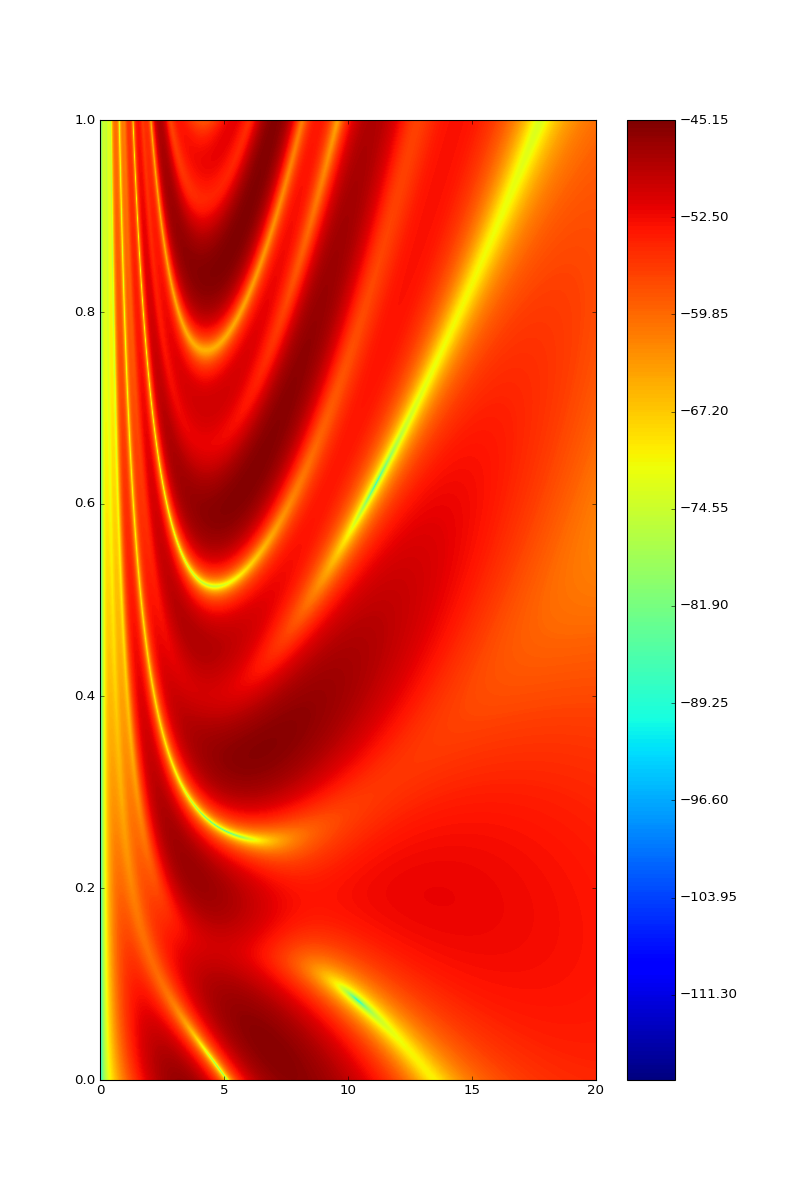

In [12]:
fig = plt.figure(5, figsize=(10,15))

distance = np.linspace(0.0, 20.0, 1000)
time = np.linspace(0.0, 1, 1000)
D,T = meshgrid(distance, time)
P = w2db(R3PL_Doppler(D, T, ground_reflection_t2r, 20))
plt.contourf(D, T, P, 500)                             
plt.colorbar()
savefig('100kmps_4sec.png')

In [13]:
def rx_power_tag(distance, time, pathloss, speed):
    return (reader_tx_power + reader_antenna_gain + reader_cabel_loss + 
            w2db(pathloss(distance, time, ground_reflection_r2t, speed)) + tag_antenna_gain + polarization_loss)

def tx_power_tag(distance, time, pathloss, speed):
    rx = rx_power_tag(distance, time, pathloss, speed)
    return rx + tag_modulation_loss if rx >= tag_sensitivity else thermal_noise

def rx_power_reader(distance, time, pathloss, speed):    
    tx = tx_power_tag(distance, time, pathloss, speed)
    return (tx + tag_antenna_gain + w2db(pathloss(distance, time, ground_reflection_t2r, speed)) + polarization_loss +
                reader_cabel_loss + reader_antenna_gain) if tx >= reader_noise else thermal_noise

<IPython.core.display.Javascript object>


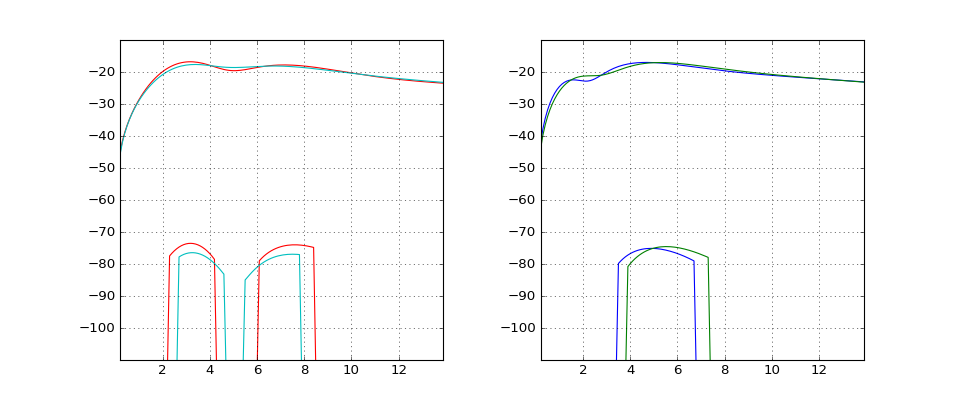

In [14]:
d = arange(0.2, 14, 0.1)

fig = figure(6, figsize=(12,5))

ax1 = subplot2grid((1,2), (0,0))
ax2 = subplot2grid((1,2), (0,1))

ax1.set_xticks(arange(0, 14, 2))
ax1.set_yticks(arange(-100, -10, 10))
ax1.set_ylim(-110, -10)
ax2.set_xticks(arange(0, 14, 2))
ax2.set_yticks(arange(-100, -10, 10))
ax2.set_ylim(-110, -10)

ax1.plot(d, [rx_power_tag(dx, 0, R3PL_Doppler, 0) for dx in d], 'r', label='RX at tag (forward)')
ax1.plot(d, [rx_power_reader(dx, 0, R3PL_Doppler, 0) for dx in d], 'r', label='RX at reader (backscattered)')

ax1.plot(d, [rx_power_tag(dx, 0, R2PL_Doppler, 0) for dx in d], 'c', label='RX at tag (forward)')
ax1.plot(d, [rx_power_reader(dx, 0, R2PL_Doppler, 0) for dx in d], 'c', label='RX at reader (backscattered)')

ax2.plot(d, [rx_power_tag(dx, 0.1, R3PL_Doppler, 20) for dx in d], 'b', label='RX at tag (forward)')
ax2.plot(d, [rx_power_reader(dx, 0.1, R3PL_Doppler, 20) for dx in d], 'b', label='RX at reader (backscattered)')

ax2.plot(d, [rx_power_tag(dx, 0.1, R2PL_Doppler, 20) for dx in d], 'g', label='RX at tag (forward)')
ax2.plot(d, [rx_power_reader(dx, 0.1, R2PL_Doppler, 20) for dx in d], 'g', label='RX at reader (backscattered)')

ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

In [15]:
from scipy.special import erf

Q = lambda x: 0.5 - 0.5 * erf(x / np.sqrt(2))

def snr(distance, time = 0, pathloss = R3PL_Doppler, speed = 0):
     return db2w(rx_power_reader(distance, time, pathloss, speed) - reader_noise)

# preamble_duration: [9.3e-6, 4.4e-3]
def sync_angle(snr, preamble_duration = 9.3e-6, bandwidth = 1.2e6):
    return 1/sqrt((snr * preamble_duration * bandwidth))

def snr_extended(snr, sync_phi = 0, miller = 1, symbol_duration = 1.25e-6, bandwidth = 1.2e6):
    return miller * snr * symbol_duration * bandwidth * cos(sync_phi) ** 2

def ber_over_awgn(snr):
    t = Q(sqrt(snr))
    return 2*t*(1 - t)

def ber_over_Rayleigh(snr):
    t = sqrt(1 + 2/(snr))
    return 0.5 - 1/t + 2/pi * arctan(t)/t

<IPython.core.display.Javascript object>


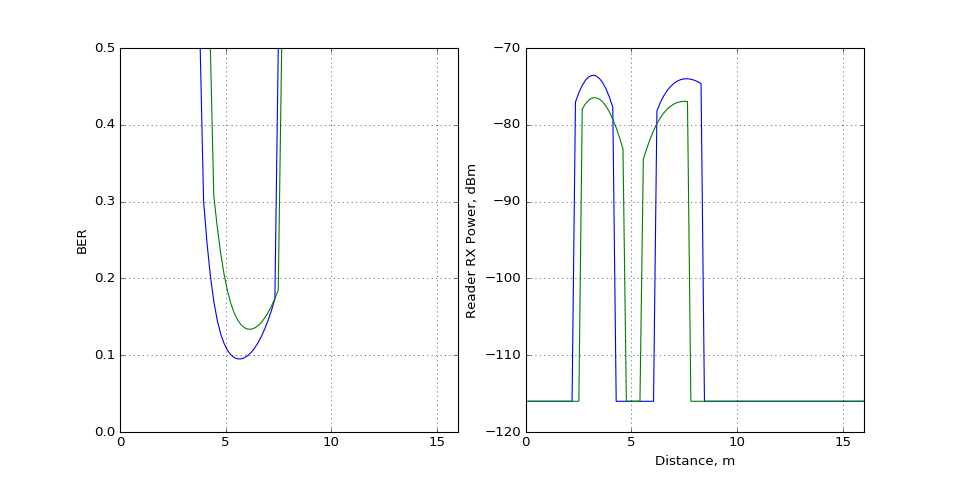

In [16]:
d = np.linspace(0.1, 16, 100)

snr_array1 = [snr(dx, 0.07, R3PL_Doppler, 20) for dx in d]
snr_e1 = [snr_extended(snr1, sync_angle(snr1)) for snr1 in snr_array1]
ber1 = [ber_over_Rayleigh(snr1) for snr1 in snr_e1]

snr_array2 = [snr(dx, 0.07, R2PL_Doppler, 20) for dx in d]
snr_e2 = [snr_extended(snr2, sync_angle(snr2)) for snr2 in snr_array2]
ber2 = [ber_over_Rayleigh(snr2) for snr2 in snr_e2]

fig = figure(7, figsize=(12,6))
ax1 = subplot2grid((1,2), (0,0))
ax2 = subplot2grid((1,2), (0,1))

ax1.plot(d, ber1, label='Two rays')
ax1.plot(d, ber2, label='Three rays')
ax1.grid(True)
ax1.set_xticks(arange(0, 16, 5))
ax1.set_ylim(0, 0.5)
ax1.set_ylabel('BER')

ax2.plot(d, [rx_power_reader(dx, 0, R3PL_Doppler, 0) for dx in d])
ax2.plot(d, [rx_power_reader(dx, 0, R2PL_Doppler, 0) for dx in d])

ax2.grid(True)
ax2.set_xticks(arange(0, 16, 5))
ax2.set_ylabel('Reader RX Power, dBm')
ax2.set_xlabel('Distance, m')

<IPython.core.display.Javascript object>


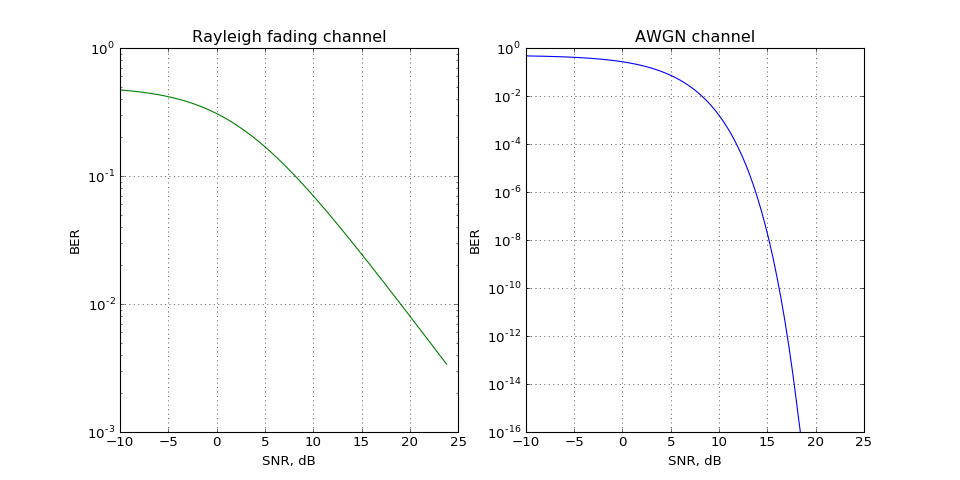

In [17]:
fig = figure(8, figsize=(12,6))
ax1 = subplot2grid((1,2), (0,0))
ax2 = subplot2grid((1,2), (0,1))

snr_array = arange(-10, 24, 0.2)
ax1.plot(snr_array, ber_over_Rayleigh(db2w(snr_array)), color='green')
# ax3.plot(snr_array, ber_over_Rayleigh(db2w(snr_array), 1, sync_phi=pi/2*0.33), color='blue')
# ax3.plot(snr_array, ber_over_Rayleigh(db2w(snr_array), 1, sync_phi=pi/2*0.46), color='cyan')
# ax3.plot(snr_array, ber_over_Rayleigh(db2w(snr_array), 1, sync_phi=pi/2*0.56), color='green')
# ax3.plot(snr_array, ber_over_Rayleigh(db2w(snr_array), 1, sync_phi=pi/2*0.64), color='red')
# ax3.plot(snr_array, ber_over_Rayleigh(db2w(snr_array), 1, sync_phi=pi/2*0.70), color='magenta')
ax1.set_yscale('log')
ax1.grid(True)
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR, dB')
ax1.set_title('Rayleigh fading channel')

ax2.plot(snr_array, ber_over_awgn(db2w(snr_array)), color='blue')
# ax2.plot(snr_array, ber_over_Rayleigh(db2w(snr_array), miller = 2), color='green')
# ax2.plot(snr_array, ber_over_Rayleigh(db2w(snr_array), miller = 4), color='red')
ax2.set_yscale('log')
ax2.grid(True)
ax2.set_ylabel('BER')
ax2.set_xlabel('SNR, dB')
ax2.set_title('AWGN channel')

<IPython.core.display.Javascript object>


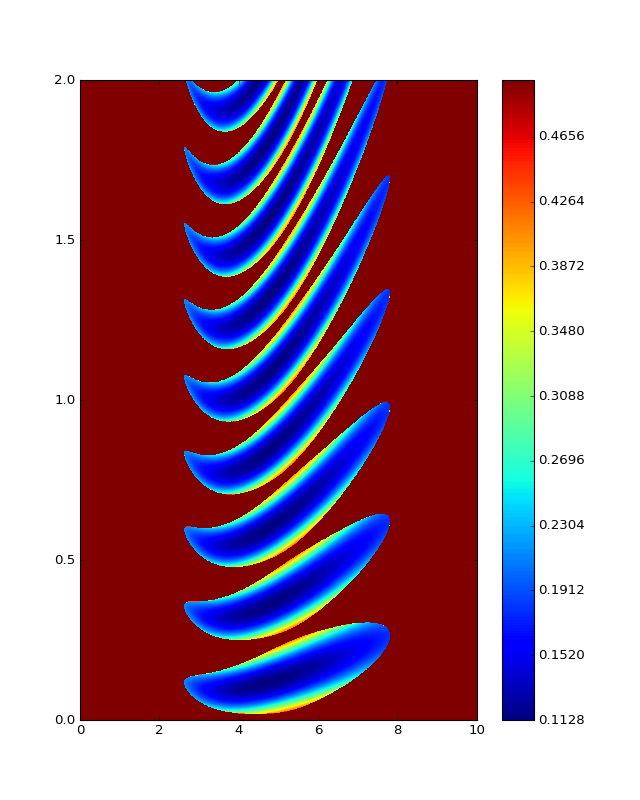

In [18]:
fig = plt.figure(9, figsize=(8,10))

vehicle_speed = 20.0
distance_max  = 10.0

distance = np.linspace(0.0, 10.0, 1000)
time = np.linspace(0.0, 2, 1000)
D,T = meshgrid(distance, time)

#
# Shift due to vehicle movement: allows to find read region (region with low BER) just
# using horizontal line t = t_0, where t_0 is a  time when vehicle passes distance_max mark.
# If there is no such shift it would have to track read region using line t = t_0 + (D-d)/v,
# where v is a vehicle speed. That is because the vehicle needs some time to pass some distance
# and by the time it arrives at a new point d_0 BER(d_0) will have changed.
#
t_shift = lambda d: (distance_max - d) / vehicle_speed

SNR = np.array([[ snr(d, t + t_shift(d), R2PL_Doppler, vehicle_speed) for d in distance] for t in time])

BER = ber_over_Rayleigh(snr_extended(SNR, sync_angle(SNR)))

plt.contourf(D, T, BER, 500)                             
plt.colorbar()
savefig('read-regions.png')

<IPython.core.display.Javascript object>


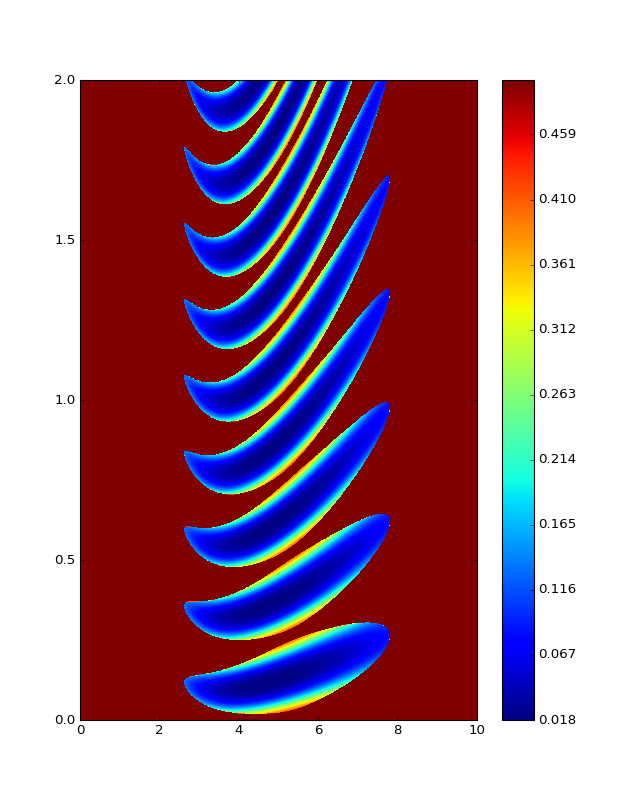

In [19]:
fig = plt.figure(10, figsize=(8,10))

# SNR has computed before. If not, run previous cell before running this one. For time saving purpose.
BER = ber_over_awgn(snr_extended(SNR, sync_angle(SNR)))

plt.contourf(D, T, BER, 500)                             
plt.colorbar()
savefig('read-regions.png')

<IPython.core.display.Javascript object>


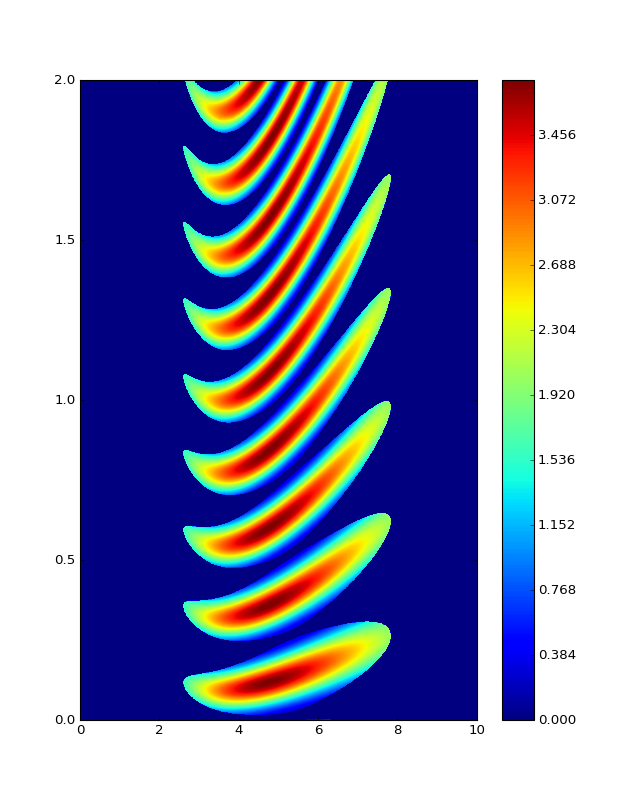

In [21]:
fig = plt.figure(11, figsize=(8,10))
plt.contourf(D, T, SNR, 500)                             
plt.colorbar()
savefig('2ray-snr.png')